<a href="https://colab.research.google.com/github/hardik4555/stibo-final-s-clustering-/blob/main/stibo_finals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing the libraries and Data**

In [2]:
import pandas as pd
raw_data=pd.read_json('convertjson.json')
from pandas import json_normalize
# raw_data['AttributeList']
raw_data


,STEP-ProductInformation
AttributeList,"{'Attribute': [{'Name': 'Screwdriver bit', 'Li..."
ListOfValuesGroupList,{'ListOfValuesGroup': [{'Name': 'Lists of Valu...
ListsOfValues,"{'ListOfValue': [{'Name': 'Seals material', 'V..."
Products,{'Product': [{'Name': 'LR2000 2000W 230V Power...
_ContextID,Context1
_ExportContext,Context1
_ExportTime,2024-01-08 13:32:56
_UseContextLocale,false
_WorkspaceID,Main


# **Removing unnecessary row's**

In [3]:
df = pd.DataFrame(raw_data)
df=df.drop(['ListOfValuesGroupList', 'ListsOfValues','_ContextID','_ExportContext', '_ExportTime','_UseContextLocale', '_WorkspaceID' ])
df



,STEP-ProductInformation
AttributeList,"{'Attribute': [{'Name': 'Screwdriver bit', 'Li..."
Products,{'Product': [{'Name': 'LR2000 2000W 230V Power...


In [4]:
products_dict=df['STEP-ProductInformation']['Products']
products_dict

{'Product': [{'Name': 'LR2000 2000W 230V Power Conditioner with Automatic Voltage Regulation (AVR), AC Surge Protection, 6 Outlets, UNIPLUGINT Adapter',
   'Values': {'Value': [{'_AttributeID': 'IceCat_Attrib_22658',
      '_UnitID': 'IceCat_Unit_24',
      '__text': '444.5'},
     {'_AttributeID': 'IceCat_Attrib_19016',
      '_UnitID': 'IceCat_Unit_38',
      '__text': '24990'},
     {'_AttributeID': 'IceCat_Attrib_762',
      '_UnitID': 'IceCat_Unit_38',
      '__text': '6030'},
     {'_AttributeID': 'IceCat_Attrib_16240',
      '_UnitID': 'IceCat_Unit_81',
      '__text': '1200'},
     {'_AttributeID': 'IceCat_Attrib_23056', '__text': '10037332040289'},
     {'_AttributeID': 'IceCat_Attrib_3808',
      '_UnitID': 'IceCat_Unit_24',
      '__text': '215.9'},
     {'_AttributeID': 'IceCat_Attrib_3806',
      '_UnitID': 'IceCat_Unit_24',
      '__text': '259.1'},
     {'_AttributeID': 'IceCat_Attrib_5932',
      '_UnitID': 'IceCat_Unit_44',
      '__text': '2000'},
     {'_AttributeID'

# **Flattening the JSON inside the dict**

**For products**

In [5]:
products_dict = df['STEP-ProductInformation']['Products']

# Flatten the 'Products' dictionary using pd.json_normalize
products_df = pd.json_normalize(products_dict['Product'])

# Display the flattened DataFrame
print(products_df)


                                                    Name  \
0      LR2000 2000W 230V Power Conditioner with Autom...   
1      1200W 120V Power Conditioner with Automatic Vo...   
2      600W 120V Power Conditioner with Automatic Vol...   
3      Isobar 2-Outlet Low-Profile Professional Audio...   
4      2400W 120V Power Conditioner with Automatic Vo...   
...                                                  ...   
12181                                  Fugen Neu Express   
12182                                        Fliesen Fix   
12183                        Voeg en tegelrand reparatie   
12184                        Voeg en tegelrand reparatie   
12185                                         Voegenfris   

                        _ID     _UserTypeID  \
0       IceCat_Prod_1668262  IceCat_Product   
1       IceCat_Prod_1668268  IceCat_Product   
2       IceCat_Prod_2273759  IceCat_Product   
3       IceCat_Prod_6291127  IceCat_Product   
4       IceCat_Prod_2273755  IceCat_Product 

**For attributes**

In [6]:
Attribute_dict = df['STEP-ProductInformation']['AttributeList']

# Flatten the 'Products' dictionary using pd.json_normalize
Attribute_df = pd.json_normalize(Attribute_dict['Attribute'])

# Display the flattened DataFrame
print(Attribute_df)

                                Name                         UserTypeLink  \
0                    Screwdriver bit  [{'_UserTypeID': 'IceCat_Product'}]   
1            Chemical flux-resistant  [{'_UserTypeID': 'IceCat_Product'}]   
2                Impact energy (max)  [{'_UserTypeID': 'IceCat_Product'}]   
3              Idle speed (1st gear)  [{'_UserTypeID': 'IceCat_Product'}]   
4                          Handguard  [{'_UserTypeID': 'IceCat_Product'}]   
...                              ...                                  ...   
4581                     Colour name  [{'_UserTypeID': 'IceCat_Product'}]   
4582              AC input frequency  [{'_UserTypeID': 'IceCat_Product'}]   
4583                Number of frames  [{'_UserTypeID': 'IceCat_Product'}]   
4584  Number of accessories included  [{'_UserTypeID': 'IceCat_Product'}]   
4585                AC input voltage  [{'_UserTypeID': 'IceCat_Product'}]   

                      _ID _MultiValued _ProductMode _FullTextIndexed  \
0  

# **Creating a mapping of AttributeID with Attribute name**

In [7]:
new_array = Attribute_df[['_ID', 'Name']].values
new_df = pd.DataFrame(new_array, columns=['ID', 'Name'])
new_df

,ID,Name
0,IceCat_Attrib_6786,Screwdriver bit
1,IceCat_Attrib_40910,Chemical flux-resistant
2,IceCat_Attrib_6782,Impact energy (max)
3,IceCat_Attrib_6787,Idle speed (1st gear)
4,IceCat_Attrib_27423,Handguard
...,...,...
4581,IceCat_Attrib_17956,Colour name
4582,IceCat_Attrib_8484,AC input frequency
4583,IceCat_Attrib_9170,Number of frames
4584,IceCat_Attrib_29632,Number of accessories included


In [8]:
sorted_df = new_df.sort_values(by='ID')
sorted_df

,ID,Name
4104,10167,Compliance
1867,4875,Attribute Description
1836,4941,Unit Description
3294,ATR_Publishing_Display_Name,Publishing Display Name
3100,ATR_Publishing_Header_Information,Publishing Header Information
...,...,...
1928,eClassAdv_DependsOn,eClass Advanced Depends On
2045,eClassAdv_Description,eClass Advanced Description
1978,eClassAdv_IRDI,eClass Advanced IRDI
1930,eClassAdv_PropertyDomainType,eClass Advanced Property Domain Type


**Map Attribute's ID with there name**

In [9]:
id_to_name_mapping = sorted_df.set_index('ID')['Name'].to_dict()
id_to_name_mapping

{'10167': 'Compliance',
 '4875': 'Attribute Description',
 '4941': 'Unit Description',
 'ATR_Publishing_Display_Name': 'Publishing Display Name',
 'ATR_Publishing_Header_Information': 'Publishing Header Information',
 'AT_AIAC_classification_type': 'Classification Type',
 'AT_AIAC_prediction_confidence': 'Confidence',
 'AT_AIAC_product_description': 'AIAC Description',
 'AT_AttributeDisplaySequence': 'Attr. DS',
 'AT_AttributeDisplaySequenceComplete': 'Attr. DS Complete',
 'AT_AttributeDisplaySequenceFix': 'Attr. DS Fix',
 'AT_AttributeDisplaySequencePivot': 'Attr. DS Pivot',
 'AT_AttributeDisplaySequenceTMP': 'Attr. DS (TMP)',
 'AT_AttributeDisplaySequenceTagglo': 'Attribute display sequence tagglo',
 'AT_AttributeDisplaySequenceTechData': 'Attr. DS TechData',
 'AT_AttributeMandatoryTagglo': 'Attribute mandatory tagglo',
 'AT_AttributeSequencePicto': 'Attr. DS Picto',
 'AT_AttributeShortCut': 'Attr. Abbreviation',
 'AT_AttributeShortName': 'Attribute Short Name',
 'AT_AttributeStyleNa

# **Further pre-processing**

**removing NaN row's (as less than 5-6%)**

In [10]:
cluster_data = products_df[['Name', 'Values.Value', 'Values.MultiValue']]
cluster_data=cluster_data.dropna()
preserved_data=cluster_data #for further reference
cluster_data

,Name,Values.Value,Values.MultiValue
0,LR2000 2000W 230V Power Conditioner with Autom...,"[{'_AttributeID': 'IceCat_Attrib_22658', '_Uni...","[{'Value': ['Y'], '_AttributeID': 'IceCat_Attr..."
1,1200W 120V Power Conditioner with Automatic Vo...,"[{'_AttributeID': 'IceCat_Attrib_22658', '_Uni...","[{'Value': ['Plastic'], '_AttributeID': 'IceCa..."
2,600W 120V Power Conditioner with Automatic Vol...,"[{'_AttributeID': 'IceCat_Attrib_22658', '_Uni...",[{'Value': ['Acrylonitrile butadiene styrene (...
3,Isobar 2-Outlet Low-Profile Professional Audio...,"[{'_AttributeID': 'IceCat_Attrib_22658', '_Uni...","[{'Value': ['China'], '_AttributeID': 'IceCat_..."
4,2400W 120V Power Conditioner with Automatic Vo...,"[{'_AttributeID': 'IceCat_Attrib_22658', '_Uni...","[{'Value': ['Y'], '_AttributeID': 'IceCat_Attr..."
...,...,...,...
12179,Fliesen Fix,"[{'_AttributeID': 'IceCat_Attrib_1675', '__tex...","[{'Value': ['Bathroom'], '_AttributeID': 'IceC..."
12180,Fugen Versiegelung,"[{'_AttributeID': 'IceCat_Attrib_13591', '__te...","[{'Value': ['Bathroom', 'Kitchen'], '_Attribut..."
12181,Fugen Neu Express,"[{'_AttributeID': 'IceCat_Attrib_1675', '__tex...","[{'Value': ['Bathroom', 'Kitchen'], '_Attribut..."
12182,Fliesen Fix,"[{'_AttributeID': 'IceCat_Attrib_1675', '__tex...","[{'Value': ['Bathroom'], '_AttributeID': 'IceC..."


In [11]:
nan_count = cluster_data.isna().sum()
nan_count

Name                 0
Values.Value         0
Values.MultiValue    0
dtype: int64

**combining Values.values and Multivalues.values into a new attribute's column**

In [12]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt

#Extracting relevant columns for clustering
cluster_data = products_df[['Name', 'Values.Value', 'Values.MultiValue']]

cluster_data['Values.Value'] = cluster_data['Values.Value'].apply(lambda x: [x] if not isinstance(x, list) else x)
cluster_data['Values.MultiValue'] = cluster_data['Values.MultiValue'].apply(lambda x: [x] if not isinstance(x, list) else x)
# Combine 'Values.Value' and 'Values.MultiValue' columns into a new column 'Attributes'
cluster_data['Attributes'] = cluster_data.apply(lambda row: row['Values.Value'] + row['Values.MultiValue'], axis=1)

cluster_data



<ipython-input-12-5fdf2333c98d>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_data['Values.Value'] = cluster_data['Values.Value'].apply(lambda x: [x] if not isinstance(x, list) else x)
<ipython-input-12-5fdf2333c98d>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_data['Values.MultiValue'] = cluster_data['Values.MultiValue'].apply(lambda x: [x] if not isinstance(x, list) else x)
<ipython-input-12-5fdf2333c98d>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

,Name,Values.Value,Values.MultiValue,Attributes
0,LR2000 2000W 230V Power Conditioner with Autom...,"[{'_AttributeID': 'IceCat_Attrib_22658', '_Uni...","[{'Value': ['Y'], '_AttributeID': 'IceCat_Attr...","[{'_AttributeID': 'IceCat_Attrib_22658', '_Uni..."
1,1200W 120V Power Conditioner with Automatic Vo...,"[{'_AttributeID': 'IceCat_Attrib_22658', '_Uni...","[{'Value': ['Plastic'], '_AttributeID': 'IceCa...","[{'_AttributeID': 'IceCat_Attrib_22658', '_Uni..."
2,600W 120V Power Conditioner with Automatic Vol...,"[{'_AttributeID': 'IceCat_Attrib_22658', '_Uni...",[{'Value': ['Acrylonitrile butadiene styrene (...,"[{'_AttributeID': 'IceCat_Attrib_22658', '_Uni..."
3,Isobar 2-Outlet Low-Profile Professional Audio...,"[{'_AttributeID': 'IceCat_Attrib_22658', '_Uni...","[{'Value': ['China'], '_AttributeID': 'IceCat_...","[{'_AttributeID': 'IceCat_Attrib_22658', '_Uni..."
4,2400W 120V Power Conditioner with Automatic Vo...,"[{'_AttributeID': 'IceCat_Attrib_22658', '_Uni...","[{'Value': ['Y'], '_AttributeID': 'IceCat_Attr...","[{'_AttributeID': 'IceCat_Attrib_22658', '_Uni..."
...,...,...,...,...
12181,Fugen Neu Express,"[{'_AttributeID': 'IceCat_Attrib_1675', '__tex...","[{'Value': ['Bathroom', 'Kitchen'], '_Attribut...","[{'_AttributeID': 'IceCat_Attrib_1675', '__tex..."
12182,Fliesen Fix,"[{'_AttributeID': 'IceCat_Attrib_1675', '__tex...","[{'Value': ['Bathroom'], '_AttributeID': 'IceC...","[{'_AttributeID': 'IceCat_Attrib_1675', '__tex..."
12183,Voeg en tegelrand reparatie,"[{'_AttributeID': 'IceCat_Attrib_13591', '__te...",[nan],"[{'_AttributeID': 'IceCat_Attrib_13591', '__te..."
12184,Voeg en tegelrand reparatie,"[{'_AttributeID': 'IceCat_Attrib_13591', '__te...",[nan],"[{'_AttributeID': 'IceCat_Attrib_13591', '__te..."


In [13]:
cluster_data['Values.Value'][0]

[{'_AttributeID': 'IceCat_Attrib_22658',
  '_UnitID': 'IceCat_Unit_24',
  '__text': '444.5'},
 {'_AttributeID': 'IceCat_Attrib_19016',
  '_UnitID': 'IceCat_Unit_38',
  '__text': '24990'},
 {'_AttributeID': 'IceCat_Attrib_762',
  '_UnitID': 'IceCat_Unit_38',
  '__text': '6030'},
 {'_AttributeID': 'IceCat_Attrib_16240',
  '_UnitID': 'IceCat_Unit_81',
  '__text': '1200'},
 {'_AttributeID': 'IceCat_Attrib_23056', '__text': '10037332040289'},
 {'_AttributeID': 'IceCat_Attrib_3808',
  '_UnitID': 'IceCat_Unit_24',
  '__text': '215.9'},
 {'_AttributeID': 'IceCat_Attrib_3806',
  '_UnitID': 'IceCat_Unit_24',
  '__text': '259.1'},
 {'_AttributeID': 'IceCat_Attrib_5932',
  '_UnitID': 'IceCat_Unit_44',
  '__text': '2000'},
 {'_AttributeID': 'IceCat_Attrib_2556',
  '_UnitID': 'IceCat_Unit_384',
  '__text': '6'},
 {'_AttributeID': 'IceCat_Attrib_3807',
  '_UnitID': 'IceCat_Unit_24',
  '__text': '203.2'},
 {'_AttributeID': 'IceCat_Attrib_1464',
  '_UnitID': 'IceCat_Unit_24',
  '__text': '177.8'},
 {'_

In [14]:
cluster_data['Values.MultiValue'][0]

[{'Value': ['Y'], '_AttributeID': 'IceCat_Attrib_1501'},
 {'Value': ['Taiwan'], '_AttributeID': 'IceCat_Attrib_3294'},
 {'Value': ['RoHS'], '_AttributeID': 'IceCat_Attrib_42513'},
 {'Value': ['Polycarbonate (PC)'], '_AttributeID': 'IceCat_Attrib_5214'},
 {'Value': ['Black'], '_AttributeID': 'IceCat_Attrib_1766'}]

In [15]:
cluster_data['Attributes'][0]

[{'_AttributeID': 'IceCat_Attrib_22658',
  '_UnitID': 'IceCat_Unit_24',
  '__text': '444.5'},
 {'_AttributeID': 'IceCat_Attrib_19016',
  '_UnitID': 'IceCat_Unit_38',
  '__text': '24990'},
 {'_AttributeID': 'IceCat_Attrib_762',
  '_UnitID': 'IceCat_Unit_38',
  '__text': '6030'},
 {'_AttributeID': 'IceCat_Attrib_16240',
  '_UnitID': 'IceCat_Unit_81',
  '__text': '1200'},
 {'_AttributeID': 'IceCat_Attrib_23056', '__text': '10037332040289'},
 {'_AttributeID': 'IceCat_Attrib_3808',
  '_UnitID': 'IceCat_Unit_24',
  '__text': '215.9'},
 {'_AttributeID': 'IceCat_Attrib_3806',
  '_UnitID': 'IceCat_Unit_24',
  '__text': '259.1'},
 {'_AttributeID': 'IceCat_Attrib_5932',
  '_UnitID': 'IceCat_Unit_44',
  '__text': '2000'},
 {'_AttributeID': 'IceCat_Attrib_2556',
  '_UnitID': 'IceCat_Unit_384',
  '__text': '6'},
 {'_AttributeID': 'IceCat_Attrib_3807',
  '_UnitID': 'IceCat_Unit_24',
  '__text': '203.2'},
 {'_AttributeID': 'IceCat_Attrib_1464',
  '_UnitID': 'IceCat_Unit_24',
  '__text': '177.8'},
 {'_

# **Replacing Attribute's ID with their name**

In [16]:
# Function to ensure that each element in the column is a list of dictionaries
def clean_attributes(attribute_list):
    if isinstance(attribute_list, list):
        return attribute_list
    else:
        return []

# Apply the cleaning function to the 'Attributes' column to ensure all elements are lists of dictionaries
cluster_data['Attributes'] = cluster_data['Attributes'].apply(clean_attributes)

print(cluster_data)

                                                    Name  \
0      LR2000 2000W 230V Power Conditioner with Autom...   
1      1200W 120V Power Conditioner with Automatic Vo...   
2      600W 120V Power Conditioner with Automatic Vol...   
3      Isobar 2-Outlet Low-Profile Professional Audio...   
4      2400W 120V Power Conditioner with Automatic Vo...   
...                                                  ...   
12181                                  Fugen Neu Express   
12182                                        Fliesen Fix   
12183                        Voeg en tegelrand reparatie   
12184                        Voeg en tegelrand reparatie   
12185                                         Voegenfris   

                                            Values.Value  \
0      [{'_AttributeID': 'IceCat_Attrib_22658', '_Uni...   
1      [{'_AttributeID': 'IceCat_Attrib_22658', '_Uni...   
2      [{'_AttributeID': 'IceCat_Attrib_22658', '_Uni...   
3      [{'_AttributeID': 'IceCat_Attrib

<ipython-input-16-1a3406437c1a>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_data['Attributes'] = cluster_data['Attributes'].apply(clean_attributes)


In [17]:
# Function to map _AttributeID values
def map_attribute_id(attribute_list):
    if isinstance(attribute_list, list):
        for d in attribute_list:
            if isinstance(d, dict) and '_AttributeID' in d:
                d['_AttributeID'] = id_to_name_mapping.get(d['_AttributeID'], d['_AttributeID'])
    return attribute_list

# Apply the mapping function to each row in the 'Attributes' column
cluster_data['Attributes'] = cluster_data['Attributes'].apply(map_attribute_id)

print(cluster_data['Attributes'])

0        [{'_AttributeID': 'Master (outer) case length'...
1        [{'_AttributeID': 'Master (outer) case length'...
2        [{'_AttributeID': 'Master (outer) case length'...
3        [{'_AttributeID': 'Master (outer) case length'...
4        [{'_AttributeID': 'Master (outer) case length'...
                               ...                        
12181    [{'_AttributeID': 'Quantity', '__text': '1'}, ...
12182    [{'_AttributeID': 'Quantity', '__text': '1'}, ...
12183    [{'_AttributeID': 'Suitable for outdoor use', ...
12184    [{'_AttributeID': 'Suitable for outdoor use', ...
12185    [{'_AttributeID': 'Suitable for outdoor use', ...
Name: Attributes, Length: 12186, dtype: object


<ipython-input-17-a94af6f00ff8>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_data['Attributes'] = cluster_data['Attributes'].apply(map_attribute_id)


In [18]:
cluster_data['Attributes'][0]

[{'_AttributeID': 'Master (outer) case length',
  '_UnitID': 'IceCat_Unit_24',
  '__text': '444.5'},
 {'_AttributeID': 'Master (outer) case gross weight',
  '_UnitID': 'IceCat_Unit_38',
  '__text': '24990'},
 {'_AttributeID': 'Package weight',
  '_UnitID': 'IceCat_Unit_38',
  '__text': '6030'},
 {'_AttributeID': 'UPS AC suppression rating',
  '_UnitID': 'IceCat_Unit_81',
  '__text': '1200'},
 {'_AttributeID': 'Master (outer) case GTIN (EAN/UPC)',
  '__text': '10037332040289'},
 {'_AttributeID': 'Package width',
  '_UnitID': 'IceCat_Unit_24',
  '__text': '215.9'},
 {'_AttributeID': 'Package depth',
  '_UnitID': 'IceCat_Unit_24',
  '__text': '259.1'},
 {'_AttributeID': 'Output power',
  '_UnitID': 'IceCat_Unit_44',
  '__text': '2000'},
 {'_AttributeID': 'AC outlets quantity',
  '_UnitID': 'IceCat_Unit_384',
  '__text': '6'},
 {'_AttributeID': 'Package height',
  '_UnitID': 'IceCat_Unit_24',
  '__text': '203.2'},
 {'_AttributeID': 'Height', '_UnitID': 'IceCat_Unit_24', '__text': '177.8'},

In [19]:
print(type(cluster_data['Attributes'][0]))

<class 'list'>


# **Making a new column containing list of attribute name's**

In [20]:
# 1. Traverse the 'Attributes' column
final_column = []
for row in cluster_data['Attributes']:
    if isinstance(row, list) and all(isinstance(attr, dict) for attr in row):
        # If 'row' is a list of dictionaries
        # 2. Extract '_AttributeID' values from each dictionary
        attribute_ids = [attr['_AttributeID'] for attr in row]
        # 3. Append the list of '_AttributeID' values into a nested list
        final_column.append(attribute_ids)
    else:
        # If 'row' is not a list of dictionaries (e.g., float), append None to 'new_column'
        final_column.append(None)

# 4. Add the nested list as a new column in cluster_data
cluster_data['final_column'] = final_column

# Display the updated cluster_data
print(cluster_data['final_column'])



0        [Master (outer) case length, Master (outer) ca...
1        [Master (outer) case length, Master (outer) ca...
2        [Master (outer) case length, Master (outer) ca...
3        [Master (outer) case length, Master (outer) ca...
4        [Master (outer) case length, Master (outer) ca...
                               ...                        
12181    [Quantity, Drying time, Suitable for indoor us...
12182    [Quantity, Drying time, Suitable for indoor us...
12183                                                 None
12184                                                 None
12185    [Suitable for outdoor use, Package height, Dry...
Name: final_column, Length: 12186, dtype: object


<ipython-input-20-c73af5c1b956>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_data['final_column'] = final_column


In [21]:
num_none_values = cluster_data['final_column'].isna().sum()
num_none_values

756

In [22]:
column_name = 'final_column'

cluster_data = cluster_data.dropna(subset=[column_name])
cluster_data

,Name,Values.Value,Values.MultiValue,Attributes,final_column
0,LR2000 2000W 230V Power Conditioner with Autom...,[{'_AttributeID': 'Master (outer) case length'...,"[{'Value': ['Y'], '_AttributeID': 'LED indicat...",[{'_AttributeID': 'Master (outer) case length'...,"[Master (outer) case length, Master (outer) ca..."
1,1200W 120V Power Conditioner with Automatic Vo...,[{'_AttributeID': 'Master (outer) case length'...,"[{'Value': ['Plastic'], '_AttributeID': 'Housi...",[{'_AttributeID': 'Master (outer) case length'...,"[Master (outer) case length, Master (outer) ca..."
2,600W 120V Power Conditioner with Automatic Vol...,[{'_AttributeID': 'Master (outer) case length'...,[{'Value': ['Acrylonitrile butadiene styrene (...,[{'_AttributeID': 'Master (outer) case length'...,"[Master (outer) case length, Master (outer) ca..."
3,Isobar 2-Outlet Low-Profile Professional Audio...,[{'_AttributeID': 'Master (outer) case length'...,"[{'Value': ['China'], '_AttributeID': 'Country...",[{'_AttributeID': 'Master (outer) case length'...,"[Master (outer) case length, Master (outer) ca..."
4,2400W 120V Power Conditioner with Automatic Vo...,[{'_AttributeID': 'Master (outer) case length'...,"[{'Value': ['Y'], '_AttributeID': 'LED indicat...",[{'_AttributeID': 'Master (outer) case length'...,"[Master (outer) case length, Master (outer) ca..."
...,...,...,...,...,...
12179,Fliesen Fix,"[{'_AttributeID': 'Quantity', '__text': '1'}, ...","[{'Value': ['Bathroom'], '_AttributeID': 'Suit...","[{'_AttributeID': 'Quantity', '__text': '1'}, ...","[Quantity, Drying time, Suitable for indoor us..."
12180,Fugen Versiegelung,"[{'_AttributeID': 'Suitable for outdoor use', ...","[{'Value': ['Bathroom', 'Kitchen'], '_Attribut...","[{'_AttributeID': 'Suitable for outdoor use', ...","[Suitable for outdoor use, Quantity, Drying ti..."
12181,Fugen Neu Express,"[{'_AttributeID': 'Quantity', '__text': '1'}, ...","[{'Value': ['Bathroom', 'Kitchen'], '_Attribut...","[{'_AttributeID': 'Quantity', '__text': '1'}, ...","[Quantity, Drying time, Suitable for indoor us..."
12182,Fliesen Fix,"[{'_AttributeID': 'Quantity', '__text': '1'}, ...","[{'Value': ['Bathroom'], '_AttributeID': 'Suit...","[{'_AttributeID': 'Quantity', '__text': '1'}, ...","[Quantity, Drying time, Suitable for indoor us..."


# **Using Tf-Idf**

**converting each element of attribute column's into string**

In [23]:
cluster_data['tf-idf column'] = cluster_data['final_column'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)


<ipython-input-23-35ad0447a71a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_data['tf-idf column'] = cluster_data['final_column'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)


**forming tf-idf matrix**

In [24]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(cluster_data['tf-idf column'])

print(X)

  (0, 165)	0.02229666261579782
  (0, 600)	0.023351023527290186
  (0, 470)	0.05414396833253917
  (0, 377)	0.07767200411057809
  (0, 135)	0.08223092335900567
  (0, 754)	0.08223092335900567
  (0, 533)	0.09379505196360373
  (0, 514)	0.032599977078239674
  (0, 204)	0.09379505196360373
  (0, 398)	0.08914458692805144
  (0, 440)	0.08876467895682678
  (0, 220)	0.020894362786532675
  (0, 39)	0.020894362786532675
  (0, 564)	0.042636607179979524
  (0, 601)	0.04766048720744415
  (0, 197)	0.15574057274991182
  (0, 366)	0.09675249083347173
  (0, 611)	0.0374408193281839
  (0, 539)	0.06809514512358897
  (0, 592)	0.07177902008513877
  (0, 541)	0.0871357222259613
  (0, 219)	0.06598179927307612
  (0, 855)	0.092367398051475
  (0, 820)	0.09185264791641212
  (0, 264)	0.0919072737325888
  :	:
  (11428, 39)	0.05559300904495793
  (11428, 611)	0.09961767338049414
  (11428, 549)	0.0978010228441145
  (11429, 496)	0.18102180298767934
  (11429, 626)	0.1849840380016812
  (11429, 258)	0.18486413234914387
  (11429, 507

# **Applying SVD to reduce dimensionality**

In [25]:
# Apply TruncatedSVD to reduce dimensionality
svd = TruncatedSVD(n_components=50)
X_svd = svd.fit_transform(X)
X_svd


array([[ 0.1468884 ,  0.24317596,  0.4780453 , ..., -0.06181447,
         0.00511931,  0.00610492],
       [ 0.15241175,  0.25639848,  0.47911134, ..., -0.0494858 ,
         0.01337757,  0.01516892],
       [ 0.15374016,  0.27110811,  0.48819278, ..., -0.05415721,
         0.00887538,  0.00200688],
       ...,
       [ 0.3537023 , -0.02383362, -0.18515426, ...,  0.02810472,
         0.04420124,  0.02081429],
       [ 0.51161081, -0.01389474, -0.23195036, ...,  0.04656576,
         0.06349877,  0.00915467],
       [ 0.64208858, -0.03338987,  0.00622674, ..., -0.01832717,
         0.01079083,  0.00221847]])

# **Checking optimal value of K using elbow method**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-26-7f4489ab354a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_data['Cluster'] = kmeans.fit_predict(X_svd)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Se

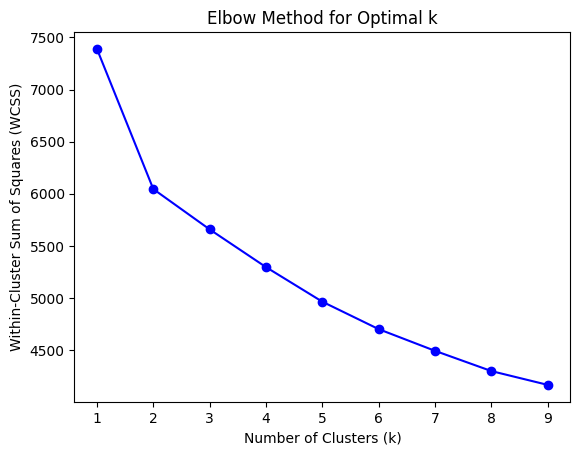

In [26]:
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_data['Cluster'] = kmeans.fit_predict(X_svd)

# Calculate the within-cluster sum of squares (WCSS) for different values of k
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_svd)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method to determine the optimal number of clusters
plt.plot(range(1, 10), wcss, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()



# **Fitting the Model**

In [27]:
num_clusters = 10
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_data['Cluster'] = kmeans.fit_predict(X_svd)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-27-11d2a96ecec1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_data['Cluster'] = kmeans.fit_predict(X_svd)


# **Clusters on basis of similar attributes**

                                                    Name  Cluster
0      LR2000 2000W 230V Power Conditioner with Autom...        4
1      1200W 120V Power Conditioner with Automatic Vo...        4
2      600W 120V Power Conditioner with Automatic Vol...        4
3      Isobar 2-Outlet Low-Profile Professional Audio...        4
4      2400W 120V Power Conditioner with Automatic Vo...        4
...                                                  ...      ...
12179                                        Fliesen Fix        8
12180                                 Fugen Versiegelung        8
12181                                  Fugen Neu Express        8
12182                                        Fliesen Fix        8
12185                                         Voegenfris        8

[11430 rows x 2 columns]


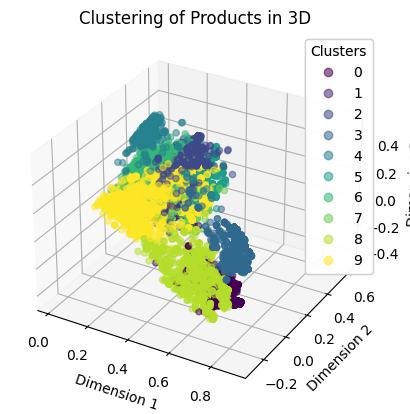

In [28]:
# Display the resulting clusters
print(cluster_data[['Name', 'Cluster']])


from mpl_toolkits.mplot3d import Axes3D

# Assuming X_svd has 3 dimensions after TruncatedSVD
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(X_svd[:, 0], X_svd[:, 1], X_svd[:, 2], c=cluster_data['Cluster'], cmap='viridis', alpha=0.5)

# Legend
legend = ax.legend(*scatter.legend_elements(), title='Clusters')
ax.add_artist(legend)

# Set labels and title
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_zlabel('Dimension 3')
ax.set_title('Clustering of Products in 3D')

plt.show()


In [29]:
cluster_data

,Name,Values.Value,Values.MultiValue,Attributes,final_column,tf-idf column,Cluster
0,LR2000 2000W 230V Power Conditioner with Autom...,[{'_AttributeID': 'Master (outer) case length'...,"[{'Value': ['Y'], '_AttributeID': 'LED indicat...",[{'_AttributeID': 'Master (outer) case length'...,"[Master (outer) case length, Master (outer) ca...",Master (outer) case length Master (outer) case...,4
1,1200W 120V Power Conditioner with Automatic Vo...,[{'_AttributeID': 'Master (outer) case length'...,"[{'Value': ['Plastic'], '_AttributeID': 'Housi...",[{'_AttributeID': 'Master (outer) case length'...,"[Master (outer) case length, Master (outer) ca...",Master (outer) case length Master (outer) case...,4
2,600W 120V Power Conditioner with Automatic Vol...,[{'_AttributeID': 'Master (outer) case length'...,[{'Value': ['Acrylonitrile butadiene styrene (...,[{'_AttributeID': 'Master (outer) case length'...,"[Master (outer) case length, Master (outer) ca...",Master (outer) case length Master (outer) case...,4
3,Isobar 2-Outlet Low-Profile Professional Audio...,[{'_AttributeID': 'Master (outer) case length'...,"[{'Value': ['China'], '_AttributeID': 'Country...",[{'_AttributeID': 'Master (outer) case length'...,"[Master (outer) case length, Master (outer) ca...",Master (outer) case length Master (outer) case...,4
4,2400W 120V Power Conditioner with Automatic Vo...,[{'_AttributeID': 'Master (outer) case length'...,"[{'Value': ['Y'], '_AttributeID': 'LED indicat...",[{'_AttributeID': 'Master (outer) case length'...,"[Master (outer) case length, Master (outer) ca...",Master (outer) case length Master (outer) case...,4
...,...,...,...,...,...,...,...
12179,Fliesen Fix,"[{'_AttributeID': 'Quantity', '__text': '1'}, ...","[{'Value': ['Bathroom'], '_AttributeID': 'Suit...","[{'_AttributeID': 'Quantity', '__text': '1'}, ...","[Quantity, Drying time, Suitable for indoor us...",Quantity Drying time Suitable for indoor use S...,8
12180,Fugen Versiegelung,"[{'_AttributeID': 'Suitable for outdoor use', ...","[{'Value': ['Bathroom', 'Kitchen'], '_Attribut...","[{'_AttributeID': 'Suitable for outdoor use', ...","[Suitable for outdoor use, Quantity, Drying ti...",Suitable for outdoor use Quantity Drying time ...,8
12181,Fugen Neu Express,"[{'_AttributeID': 'Quantity', '__text': '1'}, ...","[{'Value': ['Bathroom', 'Kitchen'], '_Attribut...","[{'_AttributeID': 'Quantity', '__text': '1'}, ...","[Quantity, Drying time, Suitable for indoor us...",Quantity Drying time Suitable for indoor use S...,8
12182,Fliesen Fix,"[{'_AttributeID': 'Quantity', '__text': '1'}, ...","[{'Value': ['Bathroom'], '_AttributeID': 'Suit...","[{'_AttributeID': 'Quantity', '__text': '1'}, ...","[Quantity, Drying time, Suitable for indoor us...",Quantity Drying time Suitable for indoor use S...,8


In [30]:
num_unique_rows = cluster_data['final_column'].drop_duplicates().shape[0]

# Display the number of unique rows
print("Number of unique rows in the DataFrame:", num_unique_rows)

Number of unique rows in the DataFrame: 3779


# **Saving information of each cluster in a different CSV file**

In [31]:
for i in range(10):
  c=cluster_data[cluster_data['Cluster']==i]
  c.to_csv('/content/drive/MyDrive/database_analysis/'+'cluster_'+str(i)+'.csv')

# **Part 2**

In [102]:
csv0=pd.read_csv('/content/drive/MyDrive/database_analysis/cluster_0.csv')
csv0

,Unnamed: 0,Name,Values.Value,Values.MultiValue,Attributes,final_column,tf-idf column,Cluster
0,6824,Polyester reparatie hars,"[{'_AttributeID': 'Suitable for outdoor use', ...","[{'Value': ['Putty knife'], '_AttributeID': 'R...","[{'_AttributeID': 'Suitable for outdoor use', ...","['Suitable for outdoor use', 'Package height',...",Suitable for outdoor use Package height Suitab...,0
1,6865,Houtreparatie,"[{'_AttributeID': 'Suitable for indoor use', '...","[{'Value': ['Putty knife'], '_AttributeID': 'R...","[{'_AttributeID': 'Suitable for indoor use', '...","['Suitable for indoor use', 'HSE note', 'Packa...",Suitable for indoor use HSE note Package width...,0
2,6868,Spackvuller,"[{'_AttributeID': 'Drying time', '_UnitID': 'I...","[{'Value': ['Brush'], '_AttributeID': 'Require...","[{'_AttributeID': 'Drying time', '_UnitID': 'I...","['Drying time', 'Suitable for indoor use', 'HS...",Drying time Suitable for indoor use HSE note P...,0
3,6869,Lakplamuur,"[{'_AttributeID': 'Suitable for indoor use', '...","[{'Value': ['Putty knife'], '_AttributeID': 'R...","[{'_AttributeID': 'Suitable for indoor use', '...","['Suitable for indoor use', 'HSE note', 'Packa...",Suitable for indoor use HSE note Package width...,0
4,6870,Baksteenreparatie,"[{'_AttributeID': 'Suitable for indoor use', '...","[{'Value': ['Caulking gun'], '_AttributeID': '...","[{'_AttributeID': 'Suitable for indoor use', '...","['Suitable for indoor use', 'HSE note', 'Maxim...",Suitable for indoor use HSE note Maximum dryin...,0
...,...,...,...,...,...,...,...,...
1292,11419,Terrasolie UV Proof,"[{'_AttributeID': 'Suitable for indoor use', '...","[{'Value': ['Water-based'], '_AttributeID': 'C...","[{'_AttributeID': 'Suitable for indoor use', '...","['Suitable for indoor use', 'Minimum operating...",Suitable for indoor use Minimum operating temp...,0
1293,11423,Tuinmeubelolie Waterproof,"[{'_AttributeID': 'Suitable for indoor use', '...","[{'Value': ['Solvent-based'], '_AttributeID': ...","[{'_AttributeID': 'Suitable for indoor use', '...","['Suitable for indoor use', 'Minimum operating...",Suitable for indoor use Minimum operating temp...,0
1294,11424,Terrasolie,"[{'_AttributeID': 'Suitable for indoor use', '...","[{'Value': ['Brush', 'Paint roller', 'Spray gu...","[{'_AttributeID': 'Suitable for indoor use', '...","['Suitable for indoor use', 'Surface coverage'...",Suitable for indoor use Surface coverage Packa...,0
1295,11425,Terrasolie,"[{'_AttributeID': 'Suitable for indoor use', '...","[{'Value': ['Brush', 'Paint roller', 'Spray gu...","[{'_AttributeID': 'Suitable for indoor use', '...","['Suitable for indoor use', 'Surface coverage'...",Suitable for indoor use Surface coverage Packa...,0


In [103]:
csv0['final_column'][1000]

"['Suitable for indoor use', 'Number of coats (min)', 'Number of coats (max)', 'Surface coverage', 'Package depth', 'Maximum operating temperature', 'RAL colour (number)', 'How to store', 'Volume', 'Minimum operating temperature', 'How to use', 'Protection term', 'Maximum drying time', 'Recoat after (max)', 'Minimum drying time', 'Package width', 'Number of coats note', 'Suitable for outdoor use', 'Package height', 'Dilution note', 'Tool cleaning', 'Recoat after (min)', 'AIAC Description', 'Required tools', 'Best uses', 'Product form', 'Composition', 'Finish type', 'Opacity']"

In [104]:
csv0['final_column'][160]

"['Suitable for indoor use', 'Surface coverage', 'Package depth', 'Colour collection colour ID', 'Maximum hardening time', 'Ready mixed', 'Paint volume', 'How to store', 'Minimum hardening time', 'Moisture-resistant', 'Minimum operating temperature', 'Ready to use', 'Recoat after (max)', 'Minimum drying time', 'Package width', 'Colour name', 'Suitable for outdoor use', 'Package height', 'Recoat after (min)', 'Product type', 'Disposal & recycling', 'AIAC Description', 'Best uses', 'Product form', 'Suitable location', 'Paint colour', 'Finish type']"

In [105]:
csv0['Attributes'][0]

"[{'_AttributeID': 'Suitable for outdoor use', '__text': 'Y'}, {'_AttributeID': 'Package height', '_UnitID': 'IceCat_Unit_24', '__text': '82'}, {'_AttributeID': 'Suitable for indoor use', '__text': 'N'}, {'_AttributeID': 'HSE note', '__text': 'Voor de meest recente veiligheidsinformatie raadpleeg de etikettekst of het betreffende Material Safety Data Sheet.'}, {'_AttributeID': 'Minimum operating temperature', '_UnitID': 'IceCat_Unit_65', '__text': '10'}, {'_AttributeID': 'How to use', '__text': 'Niet verwerken onder de 10Â°C in verband met de uithardingstijd.'}, {'_AttributeID': 'Tool cleaning', '__text': 'Gereedschap direct reinigen met aceton of terpentine.'}, {'_AttributeID': 'Volume', '_UnitID': 'IceCat_Unit_142', '__text': '500'}, {'_AttributeID': 'Package width', '_UnitID': 'IceCat_Unit_24', '__text': '82'}, {'_AttributeID': 'Package depth', '_UnitID': 'IceCat_Unit_24', '__text': '80'}, {'_AttributeID': 'AIAC Description', '_Derived': 'true', '__text': 'Polyester reparatie hars'}

**Converting string's to list**

In [106]:
import ast

for i in range(len(csv0['Attributes'])):
    attributes_list = ast.literal_eval(csv0['Attributes'][i])
    csv0['Attributes'][i]=attributes_list



<ipython-input-106-2de843d9baf5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  csv0['Attributes'][i]=attributes_list


In [107]:
csv0['Attributes']

0       [{'_AttributeID': 'Suitable for outdoor use', ...
1       [{'_AttributeID': 'Suitable for indoor use', '...
2       [{'_AttributeID': 'Drying time', '_UnitID': 'I...
3       [{'_AttributeID': 'Suitable for indoor use', '...
4       [{'_AttributeID': 'Suitable for indoor use', '...
                              ...                        
1292    [{'_AttributeID': 'Suitable for indoor use', '...
1293    [{'_AttributeID': 'Suitable for indoor use', '...
1294    [{'_AttributeID': 'Suitable for indoor use', '...
1295    [{'_AttributeID': 'Suitable for indoor use', '...
1296    [{'_AttributeID': 'Suitable for indoor use', '...
Name: Attributes, Length: 1297, dtype: object

**Making a new column containing value of attribute's**

In [108]:
value_column = []
for row in csv0['Attributes']:
    if isinstance(row, list):
        # If 'row' is a list of dictionaries
        # Extract '__text' values from dictionaries, if the key exists
        attribute_ids = [attr.get('__text', None) for attr in row]
        # Append the list of '__text' values into 'value_column'
        value_column.append(attribute_ids)
    else:
        # If 'row' is not a list of dictionaries (e.g., float), append None to 'value_column'
        value_column.append(None)

# Add the nested list as a new column in csv0
csv0['value_column'] = value_column

# Display the updated csv0
print(csv0['value_column'])



0       [Y, 82, N, Voor de meest recente veiligheidsin...
1       [Y, Voor de meest recente veiligheidsinformati...
2       [10, Y, Voor de meest recente veiligheidsinfor...
3       [Y, Voor de meest recente veiligheidsinformati...
4       [Y, Voor de meest recente veiligheidsinformati...
                              ...                        
1292    [N, 10, De olie dun en gelijkmatig aanbrengen;...
1293    [N, 5, De olie dun en gelijkmatig aanbrengen. ...
1294    [N, 19, 127, 30, 3, Vorstvrij bewaren., 2.5, 1...
1295    [N, 19, 127, 30, 3, Vorstvrij bewaren., 4, 10,...
1296    [N, 5, De olie dun en gelijkmatig aanbrengen. ...
Name: value_column, Length: 1297, dtype: object


In [109]:
for i in range(len(csv0['final_column'])):
    attributes_list = ast.literal_eval(csv0['final_column'][i])
    csv0['final_column'][i]=attributes_list

<ipython-input-109-dea627caa8fc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  csv0['final_column'][i]=attributes_list


In [110]:
csv0.drop(['Values.Value', 'Values.MultiValue', 'tf-idf column', 'Cluster'], axis=1)

,Unnamed: 0,Name,Attributes,final_column,value_column
0,6824,Polyester reparatie hars,"[{'_AttributeID': 'Suitable for outdoor use', ...","[Suitable for outdoor use, Package height, Sui...","[Y, 82, N, Voor de meest recente veiligheidsin..."
1,6865,Houtreparatie,"[{'_AttributeID': 'Suitable for indoor use', '...","[Suitable for indoor use, HSE note, Package wi...","[Y, Voor de meest recente veiligheidsinformati..."
2,6868,Spackvuller,"[{'_AttributeID': 'Drying time', '_UnitID': 'I...","[Drying time, Suitable for indoor use, HSE not...","[10, Y, Voor de meest recente veiligheidsinfor..."
3,6869,Lakplamuur,"[{'_AttributeID': 'Suitable for indoor use', '...","[Suitable for indoor use, HSE note, Package wi...","[Y, Voor de meest recente veiligheidsinformati..."
4,6870,Baksteenreparatie,"[{'_AttributeID': 'Suitable for indoor use', '...","[Suitable for indoor use, HSE note, Maximum dr...","[Y, Voor de meest recente veiligheidsinformati..."
...,...,...,...,...,...
1292,11419,Terrasolie UV Proof,"[{'_AttributeID': 'Suitable for indoor use', '...","[Suitable for indoor use, Minimum operating te...","[N, 10, De olie dun en gelijkmatig aanbrengen;..."
1293,11423,Tuinmeubelolie Waterproof,"[{'_AttributeID': 'Suitable for indoor use', '...","[Suitable for indoor use, Minimum operating te...","[N, 5, De olie dun en gelijkmatig aanbrengen. ..."
1294,11424,Terrasolie,"[{'_AttributeID': 'Suitable for indoor use', '...","[Suitable for indoor use, Surface coverage, Pa...","[N, 19, 127, 30, 3, Vorstvrij bewaren., 2.5, 1..."
1295,11425,Terrasolie,"[{'_AttributeID': 'Suitable for indoor use', '...","[Suitable for indoor use, Surface coverage, Pa...","[N, 19, 127, 30, 3, Vorstvrij bewaren., 4, 10,..."


In [111]:
for i in range (1297):
  print(len(csv0['final_column'][i]), len(csv0['value_column'][i]))

12 12
16 16
14 14
15 15
18 18
15 15
16 16
15 15
15 15
15 15
13 13
17 17
15 15
16 16
16 16
13 13
13 13
14 14
16 16
15 15
12 12
15 15
15 15
15 15
15 15
15 15
13 13
14 14
16 16
15 15
13 13
16 16
14 14
14 14
14 14
16 16
14 14
14 14
15 15
22 22
21 21
15 15
15 15
16 16
14 14
14 14
16 16
15 15
13 13
14 14
15 15
15 15
24 24
21 21
14 14
15 15
16 16
15 15
17 17
15 15
13 13
22 22
15 15
15 15
16 16
16 16
16 16
14 14
16 16
22 22
15 15
15 15
16 16
14 14
13 13
16 16
13 13
15 15
14 14
15 15
15 15
17 17
13 13
16 16
15 15
16 16
40 40
28 28
47 47
34 34
34 34
43 43
47 47
43 43
47 47
47 47
43 43
45 45
45 45
39 39
47 47
43 43
37 37
42 42
39 39
46 46
47 47
43 43
37 37
44 44
40 40
27 27
34 34
35 35
27 27
39 39
35 35
42 42
27 27
47 47
45 45
44 44
47 47
45 45
25 25
27 27
39 39
37 37
27 27
28 28
27 27
38 38
47 47
47 47
44 44
30 30
40 40
29 29
27 27
36 36
47 47
47 47
46 46
34 34
45 45
44 44
21 21
44 44
36 36
27 27
47 47
26 26
39 39
31 31
45 45
30 30
27 27
47 47
43 43
27 27
27 27
46 46
47 47
35 35
35 35
40 40
30 3

# **Expanding each attribute as a single column**

In [120]:
import pandas as pd


dfs = []

# Iterate over each row of csv0
for index, row in csv0.iterrows():
    # Create a DataFrame from the current row
    product_data = pd.DataFrame([dict(zip(row['final_column'], row['value_column']))])
    # Append the DataFrame to the list of DataFrames
    dfs.append(product_data)

# Concatenate the list of DataFrames into a single DataFrame
new_df = pd.concat(dfs, ignore_index=True)

# Fill missing values with NaN
new_df.fillna(value=pd.np.nan, inplace=True)

# Reorder columns alphabetically
new_df = new_df.reindex(sorted(new_df.columns), axis=1)

# Print the new DataFrame
new_df


<ipython-input-120-a40ab611c257>:17: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  new_df.fillna(value=pd.np.nan, inplace=True)


,AIAC Description,Abrasion-resistant,Application methods,Application temperature (max),Application temperature (min),Best uses,Binding substance type,Breathable,Colour collection colour ID,Colour name,...,Varnish colour,Volatile organic compounds (VOC) content,Volatile organic compounds (VOC) content labelling system,Volume,Washable,Water vapor permeable,Water-based,Water-resistant,Wear-resistant,Weatherproof
0,Polyester reparatie hars,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,500,NaN,NaN,NaN,NaN,NaN,NaN
1,Houtreparatie,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,Naturel,...,NaN,NaN,NaN,0.15,NaN,NaN,NaN,NaN,NaN,NaN
2,Spackvuller,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Gebroken wit,...,NaN,NaN,NaN,0.33,NaN,NaN,NaN,NaN,NaN,NaN
3,Lakplamuur,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,Wit,...,NaN,NaN,NaN,0.8,NaN,NaN,NaN,NaN,NaN,NaN
4,Baksteenreparatie,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,Geel-Bruin,...,NaN,NaN,NaN,0.31,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1292,Terrasolie UV Proof,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Kleurloos,...,NaN,NaN,NaN,2.5,NaN,NaN,NaN,NaN,NaN,NaN
1293,Tuinmeubelolie Waterproof,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Kleurloos,...,NaN,NaN,NaN,0.5,NaN,NaN,NaN,NaN,NaN,NaN
1294,Terrasolie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Kleurloos,...,NaN,NaN,NaN,2.5,NaN,NaN,NaN,NaN,NaN,NaN
1295,Terrasolie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Kleurloos,...,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN


# **remove column's having NaN value's greater than 5%**

In [127]:
# Calculate the number of NaN values in each column
nan_counts = new_df.isna().sum()

# Get the names of columns where NaN values exceed 64
columns_to_remove = nan_counts[nan_counts > 64].index

# Remove columns from DataFrame
new_df = new_df.drop(columns=columns_to_remove)

print("DataFrame after removing columns with NaN values greater than 64:")
new_df

DataFrame after removing columns with NaN values greater than 64:


,AIAC Description,Package depth,Package height,Package width,Suitable for indoor use
0,Polyester reparatie hars,80,82,82,N
1,Houtreparatie,38,200,100,Y
2,Spackvuller,48,227,50,Y
3,Lakplamuur,59,120,120,Y
4,Baksteenreparatie,10,217,217,Y
...,...,...,...,...,...
1292,Terrasolie UV Proof,128,163,166,N
1293,Tuinmeubelolie Waterproof,44,168,99,N
1294,Terrasolie,127,163,166,N
1295,Terrasolie,127,244,166,N


In [128]:
print(type(new_df['Package height'][0]))

<class 'str'>


# **Creating final table to apply clustering on**

In [129]:


# Specify columns where you want to convert string values to numeric
columns_to_convert = ['Package depth', 'Package height','Package width' ]

# Convert string values to numeric in selected columns
new_df[columns_to_convert] = new_df[columns_to_convert].apply(pd.to_numeric)

print("DataFrame after converting string values to numeric:")
new_df


DataFrame after converting string values to numeric:


,AIAC Description,Package depth,Package height,Package width,Suitable for indoor use
0,Polyester reparatie hars,80.0,82.0,82.0,N
1,Houtreparatie,38.0,200.0,100.0,Y
2,Spackvuller,48.0,227.0,50.0,Y
3,Lakplamuur,59.0,120.0,120.0,Y
4,Baksteenreparatie,10.0,217.0,217.0,Y
...,...,...,...,...,...
1292,Terrasolie UV Proof,128.0,163.0,166.0,N
1293,Tuinmeubelolie Waterproof,44.0,168.0,99.0,N
1294,Terrasolie,127.0,163.0,166.0,N
1295,Terrasolie,127.0,244.0,166.0,N


 **encoding categorical variable's**

In [131]:
mapping = {'Y': 1, 'N': 0}

# Convert the column with categorical values to numeric using map
new_df['Suitable for indoor use'] = new_df['Suitable for indoor use'].map(mapping)

print("DataFrame after converting categorical values to numeric:")
new_df

DataFrame after converting categorical values to numeric:


,AIAC Description,Package depth,Package height,Package width,Suitable for indoor use
0,Polyester reparatie hars,80.0,82.0,82.0,0.0
1,Houtreparatie,38.0,200.0,100.0,1.0
2,Spackvuller,48.0,227.0,50.0,1.0
3,Lakplamuur,59.0,120.0,120.0,1.0
4,Baksteenreparatie,10.0,217.0,217.0,1.0
...,...,...,...,...,...
1292,Terrasolie UV Proof,128.0,163.0,166.0,0.0
1293,Tuinmeubelolie Waterproof,44.0,168.0,99.0,0.0
1294,Terrasolie,127.0,163.0,166.0,0.0
1295,Terrasolie,127.0,244.0,166.0,0.0


In [132]:
new_df['AIAC Description']

0        Polyester reparatie hars
1                   Houtreparatie
2                     Spackvuller
3                      Lakplamuur
4               Baksteenreparatie
                  ...            
1292          Terrasolie UV Proof
1293    Tuinmeubelolie Waterproof
1294                   Terrasolie
1295                   Terrasolie
1296               Tuinmeubelolie
Name: AIAC Description, Length: 1297, dtype: object

In [133]:
new_df = pd.get_dummies(new_df['AIAC Description'])

print("DataFrame after one-hot encoding:")
new_df

DataFrame after one-hot encoding:


,2in1 Elastische struktuurverf,2in1 Structuurverf haarscheuroverbruggend,2in1 muurverf badkamer en keuken,2in1 muurverf renovatie,2in1 muurverf superieur,2in1 muurverf vlekken,2in1 muurverf vochtige muren en kelders,AZ plus,Acryl Radiatorlak,Allesvuller,...,Vloervuller,W100,W210,W300,Warmwaterbestendige tegellak,Xtra voorstrijk vlekken,Zijdeglans Terpentinebasis,Zijdeglans Waterbasis,Zijdemat,Zwarte Teer
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1292,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1293,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1294,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1295,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# **Fitting K means**

In [140]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(new_df)

# Get cluster labels
cluster_labels = kmeans.labels_

# Add cluster labels to the DataFrame
new_df['Cluster'] = cluster_labels



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [138]:
cluster_counts = new_df['Cluster'].value_counts()

print("Number of elements in each cluster:")
cluster_counts

Number of elements in each cluster:


1    1027
4      96
2      75
3      70
0      29
Name: Cluster, dtype: int64